# Part 1: Dynamical Evolution of a Hernquist Elliptical Galaxy in an NFW Halo with a Massive Perturber

This project presents an approximation of a system composed by an elliptical galaxy embedded in a dark matter halo in equilibrium. Then a massive perturber is added (see some sections below).

The stellar distribution of the galaxy is initialized with positions and velocities based on the Hernquist profile. In particular, the velocities are determined using the isotropic velocity dispersion from the Jeans equation, assuming spherical symmetry and equilibrium. To represent the dark matter halo the Navarro-Frenk-White density profile was chosen. Here, the velocities are calculated using a similar Jeans-equation approach for an isotropic velocity distribution, assuming the NFW potential dominates the outer halo. \
Another crucial point states that both the galaxy and the halo are individually initialized under the assumption that they are in equilibrium.
The combined system implicitly assumes that the stellar component (Hernquist) is embedded in and influenced by the gravitational potential of the dark matter halo (NFW). So viceversa, leading to a numerical approach in the determination of the velocity dispersions. This is underline by the fact that the galaxy and halo are initialized in equilibrium separately, meaning each component would not collapse or expand significantly if evolved independently.


## Hernquist profile

Hernquist profile is well-suited for modeling the stellar density distribution of an elliptical galaxy. \
It has a density profile that approximates the de Vaucouleurs surface brightness law (de Vaucouleurs, 1948), which is defined as: $\log_{10} \left[ \frac{I(R)}{I(R_e)} \right] = -3.331 \left[ \left( \frac{R}{R_e} \right)^{1/4} - 1 \right]$ and it is commonly used to describe elliptical galaxies. Indeed, although convenient for representing the observable properties of galaxies and bulges, the de Vaucouleurs profile is less useful for theoretical analyses since its deprejected mass density, $\rho(r)$, is not tractable analytically (e.g., Young 1976). Hence the need of an analytical density profile (Hernquist L., 1990):
$$
\begin{align}
\rho(r) = \frac{M}{2\pi} \frac{a}{r} \frac{1}{(r + a)^3}
\end{align}
$$

where:
- $M$: Total mass of the galaxy
- $a$: Scale radius
- $r$: Radial distance from the center


The gravitational potential for the Hernquist profile is:

$$
\begin{align}
\Phi(r) = -\frac{GM}{r + a} \tag{2}
\end{align}
$$

where:
- $G$: Gravitational constant

The mass enclosed within a radius $r$, so the cumulative mass distribution, is:

$$
\begin{align}
M(<r) = M \frac{r^2}{(r + a)^2} \tag{3}
\end{align}
$$

The inverse of the cumulative mass distribution is used to sample radii:

$$
\begin{align}
r = \frac{a \sqrt{u}}{1 - \sqrt{u}} \tag{4}
\end{align}
$$

where $u$ is a uniform random number between 0 and 1.


## Navarro-Frenk-White profile

The Navarro Frenk White profile describes the dark matter halo in which the elliptical galaxy is embedded, using the following relation:
$$
\begin{align}
\rho(r) = \frac{\rho_s}{\frac{r}{r_s} \left( 1 + \frac{r}{r_s} \right)^2}, \tag{5}
\end{align}
$$
where:
- $\rho_s$ is the characteristic density.
- $r_s$ is the scale radius.

The cumulative mass $M(r)$ enclosed within a radius $r$ for the NFW profile is:
$$
\begin{align}
M(r) = 4 \pi \int_0^r \rho(r') r'^2 \, dr'. \tag{6}
\end{align}
$$

Substituting $\rho(r)$:
$$
M(r) = 4 \pi \rho_s r_s^3 \left[ \ln\left( 1 + \frac{r}{r_s} \right) - \frac{\frac{r}{r_s}}{1 + \frac{r}{r_s}} \right].
$$

At the virial radius $r_{vir}$, the total mass $M_{NFW}$ is:
$$
M_{\text{NFW}} = M(r_{\text{vir}}) = 4 \pi \rho_s r_s^3 \left[ \ln\left( 1 + \frac{r_{\text{vir}}}{r_s} \right) - \frac{\frac{r_{\text{vir}}}{r_s}}{1 + \frac{r_{\text{vir}}}{r_s}} \right].
$$

Defining the dimensionless concentration parameter $c = r_{\text{vir}} / r_s$, this becomes:
$$
\begin{align}
M_{\text{NFW}} = 4 \pi \rho_s r_s^3 \left[ \ln(1 + c) - \frac{c}{1 + c} \right]. \tag{7}
\end{align}
$$

Rearranging for $r_s$, the density $\rho_s$ becomes:
$$
\begin{align}
\rho_s = \frac{M_{\text{NFW}}}{4 \pi r_s^3 \left[ \ln(1 + c) - \frac{c}{1 + c} \right]}. \tag{8}
\end{align}
$$

Now, substitute $\rho_s$ in terms of $M_{NFW}$ into the original density formula, eq. $(5)$ and using eq. $(8)$, we get:
$$
\begin{align}
\rho(r) = \frac{M_{\text{NFW}}}{4 \pi r_s^3 \left[ \ln(1 + c) - \frac{c}{1 + c} \right]} \cdot \frac{1}{\frac{r}{r_s} \left( 1 + \frac{r}{r_s} \right)^2}. \tag{9}
\end{align}
$$

Then the NFW potential is determined:
$$
\begin{align}
\Phi(r) = -4\pi G \rho_s r_s^3 \frac{\ln(1 + r/r_s)}{r}. \tag{10}
\end{align}
$$

Also here the $\rho_s$ is substituted: 
$$
\begin{align}
\Phi(r) = - \frac{G M_{\text{NFW}}}{ \left[ \ln(1 + c) - \frac{c}{1 + c} \right]} \frac{\ln(1 + r/r_s)}{r}. \tag{11}
\end{align}
$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad

In [10]:
seed_value = 42 
np.random.seed(seed_value)

In [11]:
def calculate_scale_radius_in_iu(M_halo, H0, c, Delta_c=200):
    # Gravitational constant in kpc^3 / (M_sun * Gyr^2)
    G = 4.30091e-6  # kpc^3 / (M_sun * Gyr^2)
    
    # Critical density of the Universe (in M_sun / kpc^3)
    rho_c = (3 * (H0 / 1000)**2) / (8 * np.pi * G)  # Convert H0 (km/s/Mpc) to Gyr^-1

    # Virial radius (in kpc)
    r_vir = ((3 * M_halo) / (4 * np.pi * Delta_c * rho_c))**(1/3)
    
    # Scale radius (in kpc)
    r_s = r_vir / c
    
    # Convert to Internal Units
    r_s_iu = 1.0  # By definition, scale radius is the unit length
    r_vir_iu = r_vir / r_s  # Virial radius in IU (should equal c)

    return r_vir, r_s, r_vir_iu, r_s_iu

M_halo = 1e12  # Halo mass in M_sun
H0 = 70  # Hubble constant in km/s/Mpc
c = 10  # Concentration parameter

r_vir, r_s, r_vir_iu, r_s_iu = calculate_scale_radius_in_iu(M_halo, H0, c)

print(f"Virial Radius (r_vir): {r_vir:.2f} kpc")
print(f"Scale Radius (r_s): {r_s:.2f} kpc")
print(f"Virial Radius in IU (r_vir_iu): {r_vir_iu:.2f}")
print(f"Scale Radius in IU (r_s_iu): {r_s_iu:.2f}")


Virial Radius (r_vir): 206.28 kpc
Scale Radius (r_s): 20.63 kpc
Virial Radius in IU (r_vir_iu): 10.00
Scale Radius in IU (r_s_iu): 1.00


In [12]:
def convert_to_internal_units(M_halo, r_s, M_star=None, a=None):
    G = 1  # Gravitational constant in internal units
    
    # Internal units
    M_unit = M_halo  # Mass of the dark matter halo as the mass unit
    R_unit = r_s     # Scale radius of NFW halo as the length unit
    T_unit = np.sqrt(R_unit**3 / (G * M_unit))  # Time unit derived from the chosen units
    
    # If mass of stellar component (M_star) and scale radius (a) are provided, convert them:
    if M_star is not None and a is not None:
        # Convert the mass of the stellar component to internal units
        M_star_IU = M_star / M_unit
        
        # Convert the scale radius of the stellar component (a) to internal units
        a_IU = a / R_unit
        
        return M_unit, R_unit, T_unit, M_star_IU, a_IU
    
    return M_unit, R_unit, T_unit

M_star = 1e11  # Mass of the stellar component (in M_sun)
a = 5  # Scale radius of the Hernquist profile (in kpc)

M_unit, R_unit, T_unit, M_star_IU, a_IU = convert_to_internal_units(M_halo, r_s, M_star, a)

print(f"Mass Unit (phys units): {M_unit} M_sun")
print(f"Length Unit (phys units): {R_unit:.4f} kpc")
print(f"Time Unit (phys units): {T_unit:.4f} Myr")
print(f"Stellar Mass in IU: {M_star_IU}")
print(f"Stellar Scale Radius (a) in IU: {a_IU:.4f}")
print(f"Dynamical time approx in IU: {T_unit/T_unit:.4f}")


Mass Unit (phys units): 1000000000000.0 M_sun
Length Unit (phys units): 20.6279 kpc
Time Unit (phys units): 0.0001 Myr
Stellar Mass in IU: 0.1
Stellar Scale Radius (a) in IU: 0.2424
Dynamical time approx in IU: 1.0000


Here below the Hernquist elliptical galaxy and NFW halo parameters used in the simulation

In [13]:
M_hernquist = M_star_IU = 0.1  # Total stellar mass
a_hernquist = a_IU = 0.2424 # Scale radius for Hernquist profile

G = 1.0  # Gravitational constant

M_NFW = 1.0  # Total dark matter mass (virial mass)
r_s = 1.0 # Scale radius for NFW profile
c = 10.0  # Concentration parameter for the NFW profile = r_vir / r_s
#note: high concentration parameters, such as those derived from X-ray observations, are more consistent with the observed properties of elliptical galaxies (Mamon et al. 2004)

N_stars = 3000  # Number of particles for the stellar component 
N_halo = 7000  # Number of particles for the dark matter halo

m_star = M_hernquist / N_stars  # Mass of each star particle
m_halo = M_NFW / N_halo  # Mass of each dark matter particle

print("Individual star particles mass: ",m_star)
print("Individual dark matter particles mass: ",m_halo)

Individual star particles mass:  3.3333333333333335e-05
Individual dark matter particles mass:  0.00014285714285714287


Definition of principal quantities and functions

In [14]:
def hernquist_density(r):
    return (M_hernquist / (2 * np.pi)) * (a_hernquist / r) * 1 / (r + a_hernquist)**3

def cumulative_mass_hernquist(r):
    return M_hernquist * r**2 / (r + a_hernquist)**2

def inverse_cumulative_hernquist(u):
    return a_hernquist * np.sqrt(u) / (1 - np.sqrt(u))

def truncated_inverse_cumulative_hernquist(u, r_max=10 * a_hernquist):
    max_u = (r_max / a_hernquist)**2 / (1 + r_max / a_hernquist)**2
    u = u * max_u  # Scale u to reflect the truncated range
    return a_hernquist * np.sqrt(u) / (1 - np.sqrt(u))


In [15]:
def nfw_density(r):
    factor = M_NFW / (4 * np.pi * r_s**3 * (np.log(1 + c) - c / (1 + c)))
    return factor / ((r / r_s) * (1 + r / r_s)**2)

def cumulative_mass_nfw(r):
    x = r / r_s
    return M_NFW * (np.log(1 + x) - x / (1 + x)) / (np.log(1 + c) - c / (1 + c))

### Position sampling

In [16]:
def sample_radii_hernquist(N):
    u = np.random.uniform(0, 1, N)
    return truncated_inverse_cumulative_hernquist(u)

The cumulative mass distribution for NFW cannot be inverted analytically, so we have to use numerical methods such as **rejection sampling**.
#### **Overview on rejection sampling**
Given a target probability distribution $p(x)$ and a proposal distribution $q(x)$, rejection sampling involves generating random samples from $q(x)$ and accepting or rejecting them based on how likely they are under $p(x)$. This allows to sample from $p(x)$ even if we don't know how to directly sample from it.


**Steps of Rejection Sampling**

1. **Choose a Proposal Distribution**:
   Select a probability distribution $q(x)$ from which it's easy to sample. $q(x)$ should ideally be similar to the target distribution $p(x)$, but it's not required to be exactly the same.

2. **Find a Scaling Constant**:
   Identify a constant $M$ such that for all $x$, $p(x) \leq M \cdot q(x)$
   

   The constant $M$ ensures that the scaled proposal distribution $M \cdot q(x)$ bounds the target distribution $p(x)$ from above.

3. **Sampling Process**:
   - **Step 1**: Sample a point $x$ from the proposal distribution $q(x)$.
   - **Step 2**: Sample a uniform random number $u$ from the interval $[0, 1]$.
   - **Step 3**: Accept the point $x$ if:

     $$
     u \leq \frac{p(x)}{M \cdot q(x)}
     $$

     If this condition is satisfied, accept $x$ as a valid sample from $p(x)$.
     
     - **Otherwise**, reject $x$ and repeat the process by resampling from $q(x)$.

4. **Repeat the Process**:
   Continue generating points until you have the desired number of valid samples.

In [17]:
def sample_radii_nfw(N):
    max_density = nfw_density(r_s)
    radii = []
    while len(radii) < N:
        r = np.random.uniform(0, c * r_s)
        p = np.random.uniform(0, max_density)
        if p <= nfw_density(r):
            radii.append(r)
    return np.array(radii)

In [18]:
def random_iso_pos(N):
    phi = np.random.uniform(0, 2 * np.pi, N)
    costheta = np.random.uniform(-1, 1, N)
    theta = np.arccos(costheta)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return np.column_stack((x, y, z))

In [19]:
radii_stars = sample_radii_hernquist(N_stars)
positions_stars = random_iso_pos(N_stars) * radii_stars[:, np.newaxis]

radii_halo = sample_radii_nfw(N_halo)
positions_halo = random_iso_pos(N_halo) * radii_halo[:, np.newaxis]

### Initial position distribution

In [21]:
# Extract stellar positions
x_stars = positions_stars[:, 0]
y_stars = positions_stars[:, 1]
z_stars = positions_stars[:, 2]

# Extract halo (NFW) positions
x_halo = positions_halo[:, 0]
y_halo = positions_halo[:, 1]
z_halo = positions_halo[:, 2]

Check for overlapping positions within a distribution and among them, to avoid potential issues.

In [22]:
def check_for_repeated_positions(positions, tolerance=1e-6):
    """
    Check if there are any repeated positions within a given tolerance and a given distribution.
    """
    repeated_indices = []
    N = positions.shape[0]
    for i in range(N):
        for j in range(i + 1, N):
            if np.linalg.norm(positions[i] - positions[j]) < tolerance:
                repeated_indices.append((i, j))
    return len(repeated_indices) > 0, repeated_indices

def check_for_overlapping_positions(positions1, positions2, tolerance=1e-6):
    """
    Check if there are any overlapping positions between the two distributions.

    Parameters:
    - positions1: np.ndarray, shape (N1, 3)
        Array of the first set of particle positions.
    - positions2: np.ndarray, shape (N2, 3)
        Array of the second set of particle positions.
    - tolerance: float, optional
        Minimum distance below which positions are considered overlapping.
    """
    overlapping_indices = []
    for i, pos1 in enumerate(positions1):
        for j, pos2 in enumerate(positions2):
            if np.linalg.norm(pos1 - pos2) < tolerance:
                overlapping_indices.append((i, j))
    return len(overlapping_indices) > 0, overlapping_indices

has_repeats_stars, repeats_stars = check_for_repeated_positions(positions_stars)
has_repeats_halo, repeats_halo = check_for_repeated_positions(positions_halo)
has_overlaps, overlaps = check_for_overlapping_positions(positions_stars, positions_halo)

if has_repeats_stars:
    print("Repeated positions found in stellar particles:")
    print(repeats_stars)
else:
    print("No repeated positions in stellar particles.")

if has_repeats_halo:
    print("Repeated positions found in dark matter halo particles:")
    print(repeats_halo)
else:
    print("No repeated positions in dark matter halo particles.")

if has_overlaps:
    print("Overlapping positions found between stellar and halo particles:")
    print(overlaps)
else:
    print("No overlapping positions between stellar and halo particles.")


No repeated positions in stellar particles.
No repeated positions in dark matter halo particles.
No overlapping positions between stellar and halo particles.


Here below a 2D representation of both distribution.

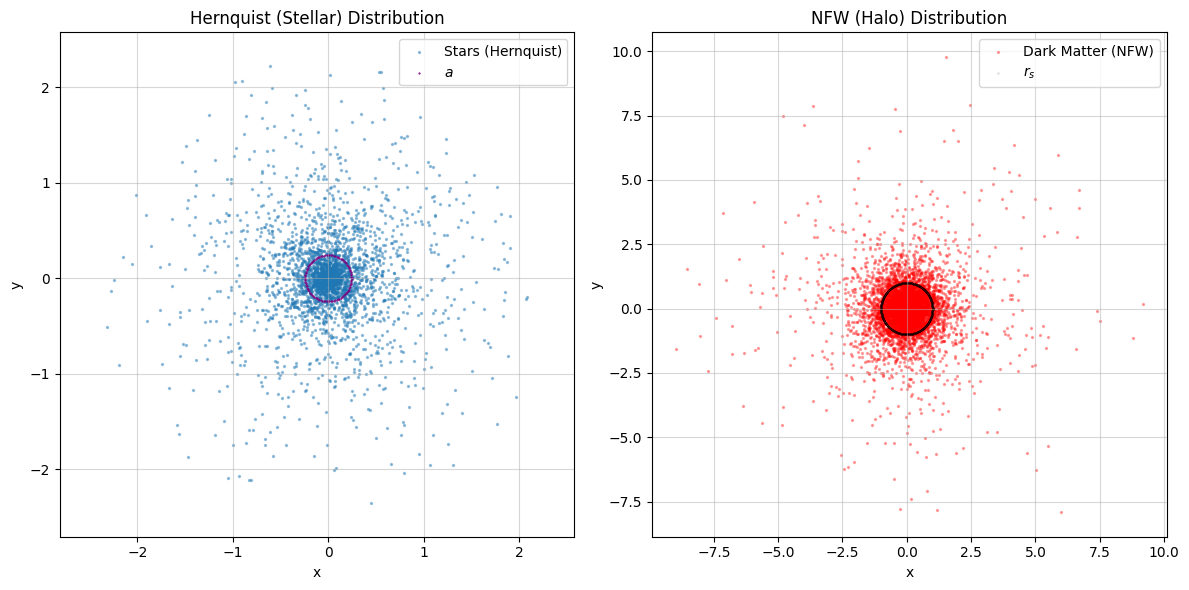

In [23]:
theta_a = np.linspace(0, 2 * np.pi, 100)
R_a = a_hernquist
x1 = R_a * np.cos(theta_a)
x2 = R_a * np.sin(theta_a)

theta_rs = np.linspace(0, 2 * np.pi, 1000)
x3 = r_s * np.cos(theta_rs)
x4 = r_s * np.sin(theta_rs)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the Hernquist profile
axes[0].scatter(x_stars, y_stars, s=2, alpha=0.4, label='Stars (Hernquist)')
axes[0].scatter(x1, x2, color='purple', alpha=1, s=0.3, label='$a$')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Hernquist (Stellar) Distribution')
axes[0].legend()
axes[0].axis('equal')
axes[0].grid(True, alpha=0.5)

# Plot for the NFW profile
axes[1].scatter(x_halo, y_halo, s=2, alpha=0.3, label='Dark Matter (NFW)', color='red')
axes[1].scatter(x3, x4, color='black', alpha=1, s=0.01, label='$r_s$')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('NFW (Halo) Distribution')
axes[1].legend()
axes[1].axis('equal')
axes[1].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()



3D representation of the distributions.

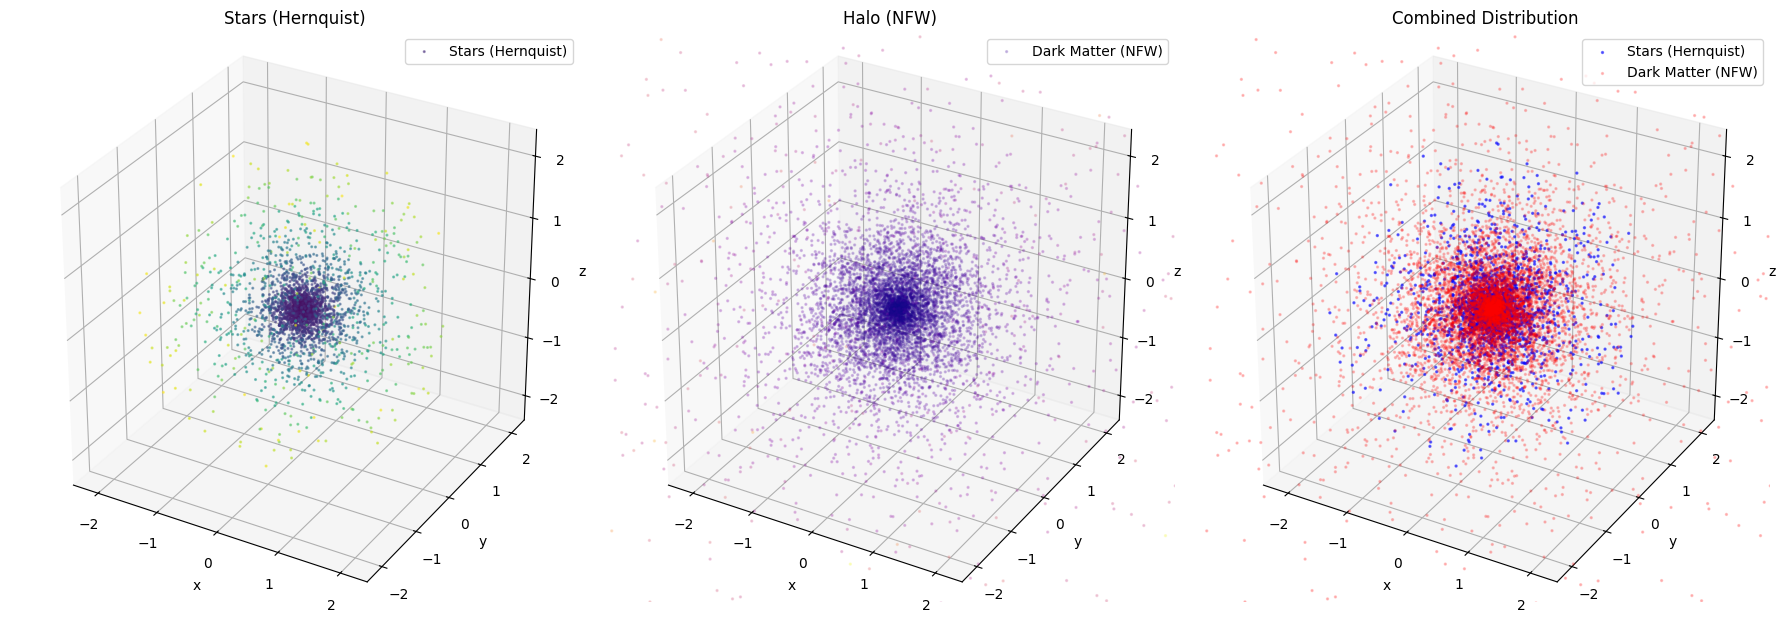

In [24]:
fig = plt.figure(figsize=(18, 6))
zoom_range = [-10*a_hernquist, 10*a_hernquist]

# Plot 1: Stars (Hernquist)
ax1 = fig.add_subplot(131, projection='3d')
sc1 = ax1.scatter(
    x_stars, y_stars, z_stars,
    c=np.sqrt(x_stars**2 + y_stars**2 + z_stars**2),  
    cmap='viridis', s=1.5, alpha=0.5, label='Stars (Hernquist)'
)
ax1.set_title('Stars (Hernquist)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_xlim(zoom_range)
ax1.set_ylim(zoom_range)
ax1.set_zlim(zoom_range)
ax1.set_box_aspect([1, 1, 1])  
ax1.legend()

# Plot 2: Halo (NFW)
ax2 = fig.add_subplot(132, projection='3d')
sc2 = ax2.scatter(
    x_halo, y_halo, z_halo,
    c=np.sqrt(x_halo**2 + y_halo**2 + z_halo**2),  
    cmap='plasma', s=2, alpha=0.2, label='Dark Matter (NFW)'
)
ax2.set_title('Halo (NFW)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_xlim(zoom_range)
ax2.set_ylim(zoom_range)
ax2.set_zlim(zoom_range)
ax2.set_box_aspect([1, 1, 1])  
ax2.legend()

# Plot 3: Combined Distribution
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(
    x_stars, y_stars, z_stars,
    c='blue', s=2, alpha=0.5, label='Stars (Hernquist)'
)
ax3.scatter(
    x_halo, y_halo, z_halo,
    c='red', s=2, alpha=0.2, label='Dark Matter (NFW)'
)
ax3.set_title('Combined Distribution')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_xlim(zoom_range)
ax3.set_ylim(zoom_range)
ax3.set_zlim(zoom_range)
ax3.set_box_aspect([1, 1, 1])  
ax3.legend()

plt.tight_layout()
plt.show()

## Potentials

In this section potentials of the Hernquist and NFW distributions, mentioned previously in eq. $(2)$ and $(11)$, are represented. At first, they are plotted separately and then their combination, which is the real potential of the entire system.

In [25]:
def hernquist_potential(r, M_hernquist, a_hernquist):
    return -G * M_hernquist / (r + a_hernquist)

def nfw_potential(r, M_NFW, r_s, c):
    factor = G * M_NFW / (np.log(1 + c) - c / (1 + c))
    return -factor * np.log(1 + r / r_s) / r

def total_potential(r, M_hernquist, a_hernquist, M_NFW, r_s, c):
    phi_hernquist = hernquist_potential(r, M_hernquist, a_hernquist)
    phi_nfw = nfw_potential(r, M_NFW, r_s, c)
    return phi_hernquist + phi_nfw


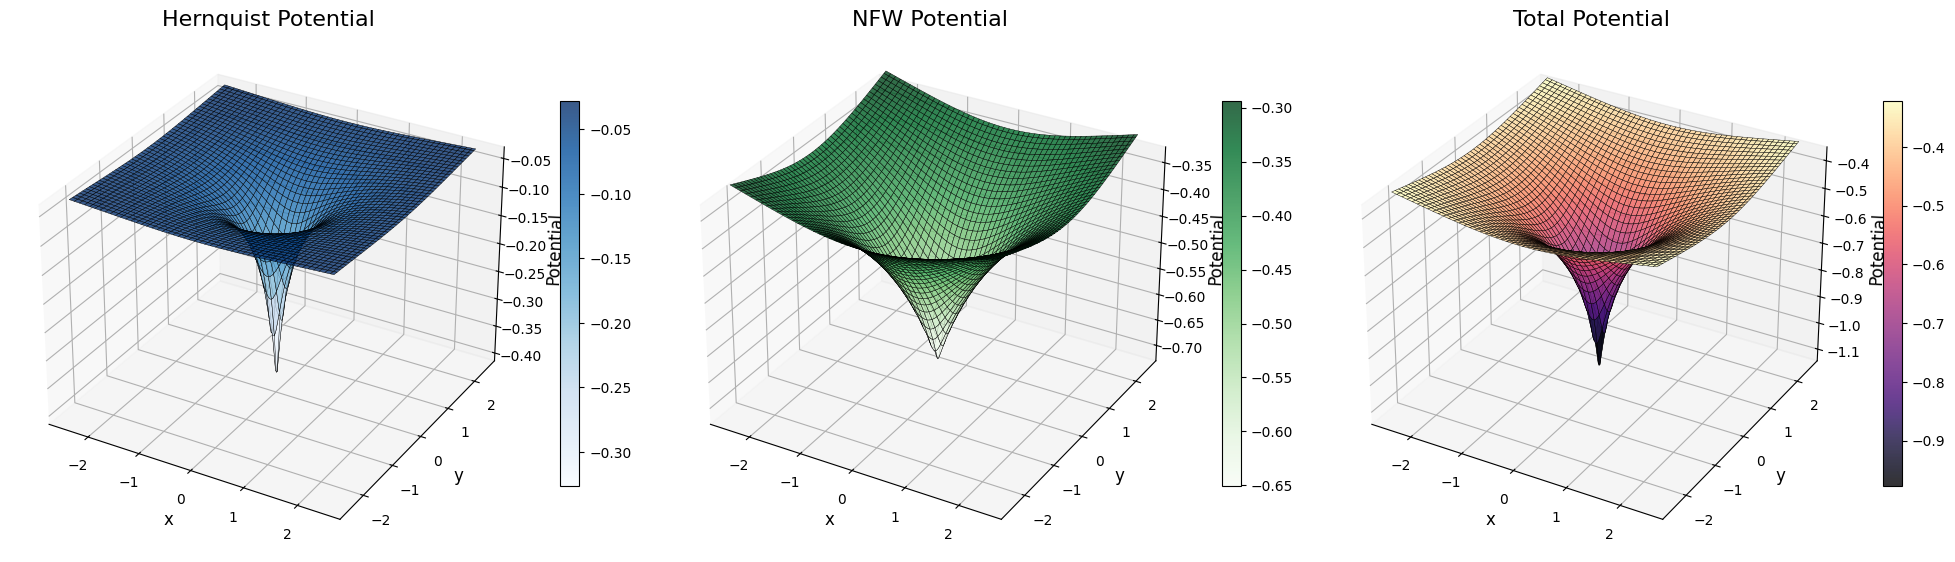

In [ ]:
# 3D representation of the potentials

grid_points = 150
x = np.linspace(-10 * a_hernquist, 10 * a_hernquist, grid_points)
y = np.linspace(-10 * a_hernquist, 10 * a_hernquist, grid_points)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)

# Potentials
pot_hernquist = hernquist_potential(r, M_hernquist, a_hernquist)
pot_nfw = nfw_potential(r, M_NFW, r_s, c)
pot_total = total_potential(r, M_hernquist, a_hernquist, M_NFW, r_s, c)

fig = plt.figure(figsize=(20, 8))

def plot_surface(ax, x, y, z, cmap, title, dynamic_zlim=True):
    surf = ax.plot_surface(x, y, z, cmap=cmap, edgecolor='k', alpha=0.8, lw=0.3)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("y", fontsize=12)
    ax.set_zlabel("Potential", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
    if dynamic_zlim:
        ax.set_zlim(z.min() * 1.1, z.max() * 1.1)  # Auto-scaling z-limits

# Hernquist Potential
ax1 = fig.add_subplot(131, projection='3d')
plot_surface(ax1, x, y, pot_hernquist, "Blues", "Hernquist Potential", dynamic_zlim=True)

# NFW Potential
ax2 = fig.add_subplot(132, projection='3d')
plot_surface(ax2, x, y, pot_nfw, "Greens", "NFW Potential", dynamic_zlim=True)

# Total Potential
ax3 = fig.add_subplot(133, projection='3d')
plot_surface(ax3, x, y, pot_total, "magma", "Total Potential", dynamic_zlim=True)
ax3.set_zlim(pot_total.min() * 1.1, pot_total.max() * 1.1)  

plt.tight_layout()
plt.show()

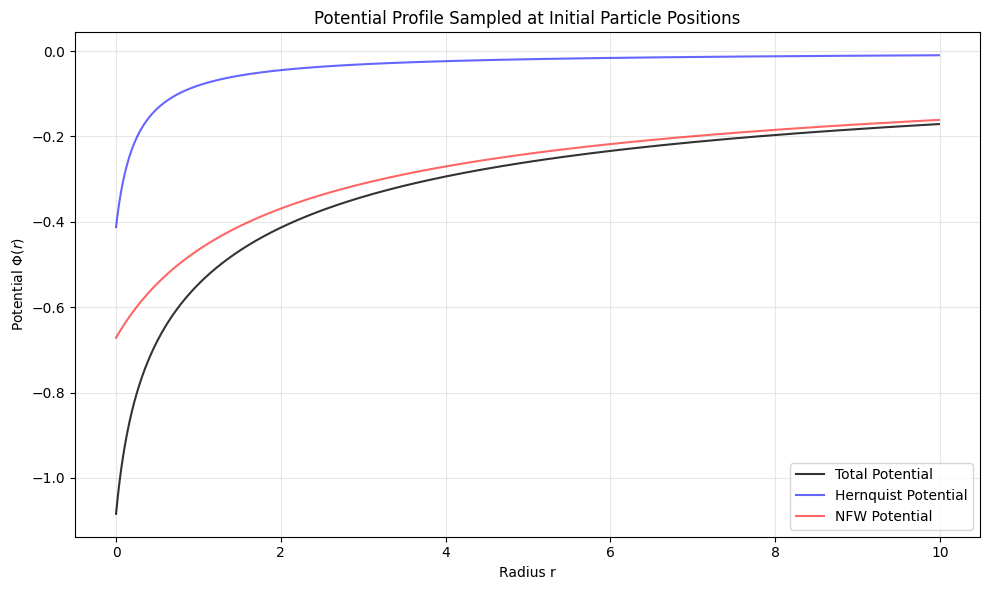

In [29]:
# 2D representation of the potentials

# Combine and sort all radii
radii_all = np.concatenate([radii_stars, radii_halo])
radii_all_sorted = np.sort(radii_all)

# Compute potentials at sampled positions
phi_total = total_potential(radii_all_sorted, M_hernquist, a_hernquist, M_NFW, r_s, c)
phi_her = hernquist_potential(radii_all_sorted, M_hernquist, a_hernquist)
phi_nfw = nfw_potential(radii_all_sorted, M_NFW, r_s, c)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(radii_all_sorted, phi_total, label="Total Potential", color="black", alpha=0.8)
plt.plot(radii_all_sorted, phi_her, label="Hernquist Potential", color="blue", alpha=0.6)
plt.plot(radii_all_sorted, phi_nfw, label="NFW Potential", color="red", alpha=0.6)

plt.xlabel("Radius r")
plt.ylabel("Potential $\Phi(r)$")
plt.title("Potential Profile Sampled at Initial Particle Positions")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Velocity initialization

### Small introduction

In a composite galaxy system such as a stellar spheroid (modeled with a Hernquist profile) embedded in a dark matter halo (modeled with an NFW profile), assigning consistent velocities is critical to ensure long-term dynamical equilibrium. Because the total potential arises from both components, generating a phase-space distribution that respects this combined structure is non-trivial. To explore the best strategy for this setup, we implement and compare two widely used approaches: the **Jeans equation** and the **Eddington inversion**.

The **Jeans method** provides a straightforward way to compute the local velocity dispersion $\sigma_r(r)$ by solving the Jeans equation under the assumption of spherical symmetry and isotropy. Velocities are then sampled from a Gaussian distribution with this dispersion, assuming that the system is locally Maxwellian. This approach is computationally fast and flexible, making it ideal for systems where full knowledge of the distribution function is not necessary.

In contrast, the **Eddington inversion** provides a more complete and rigorous method: it reconstructs the full distribution function $f(\mathcal{E})$ from the density profile and total potential, and allows direct sampling of velocities based on a particle's binding energy. This method captures the correct shape of the velocity distribution, including non-Gaussian features in the tails, and leads to more accurate equilibrium conditions — at the cost of increased computational complexity.

By presenting both approaches, we aim to compare their assumptions, accuracy, and applicability in composite systems like a Hernquist stellar bulge embedded in a dark matter halo. 

---

### Method 1: From the Jeans equation

For a non-rotating, spherical system the velocity dispersion is determined by the Jeans equation:
$$
\begin{align}
\frac{d}{dr} \left( \rho(r) \sigma_r^2(r) \right) + \frac{2\beta}{r} \rho(r) \sigma_r^2(r) = -\rho(r) \frac{d\Phi(r)}{dr}. \tag{12}
\end{align}
$$

 Terms in the Equation:
- $\rho(r)$: Density profile of the system.
- $\sigma_r^2(r)$: Radial velocity dispersion as a function of radius.
- $\Phi(r)$: Gravitational potential as a function of radius.
- $\frac{d\Phi(r)}{dr}$: Radial gravitational acceleration.
- $\beta(r)= 1 - \sigma_{\theta}^2 / \sigma_r^2(r)$, where $\sigma_r^2(r)$ is the radial velocity dispersion and $\sigma_{\theta}^2 = \sigma_{\phi}^2$ are the angular velocity dispersions.

Note: For an isotropic system, like the one here represented, $\beta(r)= 0$. 

To consider a system with a total potential composed by the sum of the Hernquist and the NFW potentials, it's necessary to solve numerically, via quadrature method, the following integrals: 

The velocity dispersion for a Hernquist profile is given by:

$$
\sigma_{r,\text{Hernquist}}^2(r) = \frac{1}{\rho_\text{Hernquist}(r)} \int_r^\infty \rho_\text{Hernquist}(r') \frac{d\phi_\text{total}}{dr'} dr'
$$

For the NFW profile, the velocity dispersion is:

$$
\sigma_{r,\text{NFW}}^2(r) = \frac{1}{\rho_\text{NFW}(r)} \int_r^\infty \rho_\text{NFW}(r') \frac{d\phi_\text{total}}{dr'} dr'
$$

Where $\frac{d\Phi(r)_{tot}}{dr} = \frac{G M_\text{Hernquist}}{(r + a_\text{Hernquist})^2} -\frac{GM_{NFW}}{\ln(1+c) - \frac{c}{1+c}} \frac{\frac{r}{r_s + r} - \ln(1 + \frac{r}{r_s})}{r^2}$

In [30]:
def dphi_total_dr(r):
    constant_term = -G * M_NFW / (np.log(1 + c) - c / (1 + c))
    term1 = r / (r_s + r)
    term2 = np.log(1 + r / r_s)
    derivative = G * M_hernquist / (r + a_hernquist)**2 + constant_term * (term1 - term2) / r**2
    return derivative


In [32]:
def sigma_r(r, rho_function):
    integrand = lambda r_prime: rho_function(r_prime) * dphi_total_dr(r_prime)
    integral, _ = quad(integrand, r, np.inf, limit=100)
    return np.sqrt(integral / rho_function(r))

Considering that, for the assumptions of spherically symmetry, isotropy in velocity space and dynamical equilibrium, we have:

$
\sigma_r^2 = \sigma_\theta^2 = \sigma_\phi^2
$

So, the **total velocity dispersion** is:

$
\sigma^2 = \langle v^2 \rangle = \sigma_r^2 + \sigma_\theta^2 + \sigma_\phi^2 = 3\sigma_r^2
$

However, when assigning velocities in Cartesian coordinates (i.e., $ v_x, v_y, v_z $), isotropy implies:

$
\langle v_x^2 \rangle = \langle v_y^2 \rangle = \langle v_z^2 \rangle = \sigma_r^2
$

Each component has the same dispersion $ \sigma_r $, and the total speed squared becomes: $\langle v^2 \rangle = v_x^2 + v_y^2 + v_z^2 \approx 3\sigma_r^2$

To ensure isotropy, we sample velocities as: $v_x, v_y, v_z \sim \mathcal{N}(0, \sigma_r)$


In [33]:
def cartesian_velocities(r_sample, rho_function):
    v_x, v_y, v_z = [], [], []
    for r in r_sample:
        sigma = sigma_r(r, rho_function)
        v_x.append(np.random.normal(0, sigma)) 
        v_y.append(np.random.normal(0, sigma))
        v_z.append(np.random.normal(0, sigma))
    return np.array(v_x), np.array(v_y), np.array(v_z)

In [34]:
seed_value = 42 
np.random.seed(seed_value)

vx_stars, vy_stars, vz_stars = cartesian_velocities(radii_stars, hernquist_density)
vx_halo, vy_halo, vz_halo = cartesian_velocities(radii_halo, nfw_density)
v_stars = np.sqrt(vx_stars**2 + vy_stars**2 + vz_stars**2)
v_halo = np.sqrt(vx_halo**2 + vy_halo**2 + vz_halo**2)
print(vx_stars.min(), vy_stars.min(), vz_stars.min())
print(vx_halo.min(), vy_halo.min(), vz_halo.min())
print(vx_stars.max(), vy_stars.max(), vz_stars.max())
print(vx_halo.max(), vy_halo.max(), vz_halo.max())

-0.9385594727989699 -0.8337137591828773 -0.8057455828589034
-1.23754223857088 -1.0072476258640692 -1.3110123995314364
0.9870707208658792 0.8135125060584478 0.8210040255215968
1.0347151325682584 1.0691391086227897 1.1628512847081314


Here below the histograms of the velocity magnitude via Jeans formulation for both stellar and dark matter distribution are presented. 

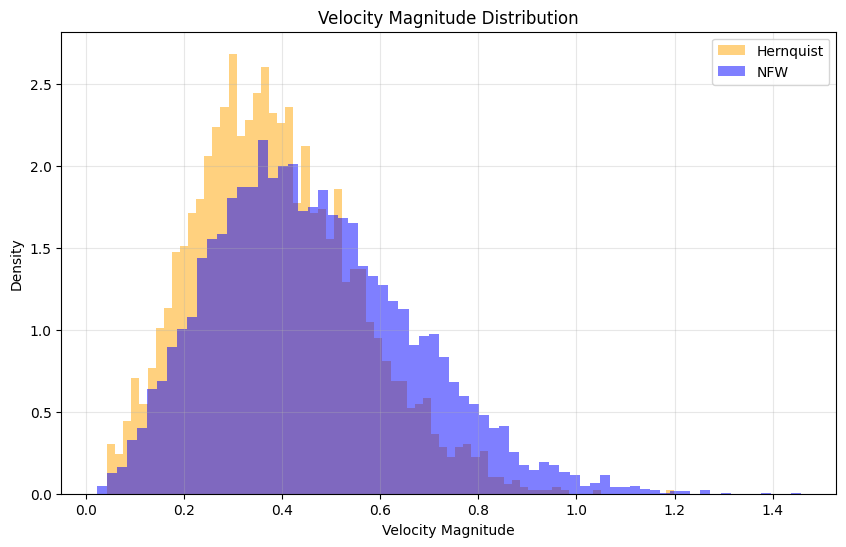

In [35]:
plt.figure(figsize=(10, 6))

plt.hist(v_stars, bins=70, alpha=0.5, label="Hernquist", color='orange', density=True)
plt.hist(v_halo, bins=70, alpha=0.5, label="NFW", color='blue', density=True)

plt.title("Velocity Magnitude Distribution")
plt.xlabel("Velocity Magnitude")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

3D representation of the velocity distribution via Jeans method.

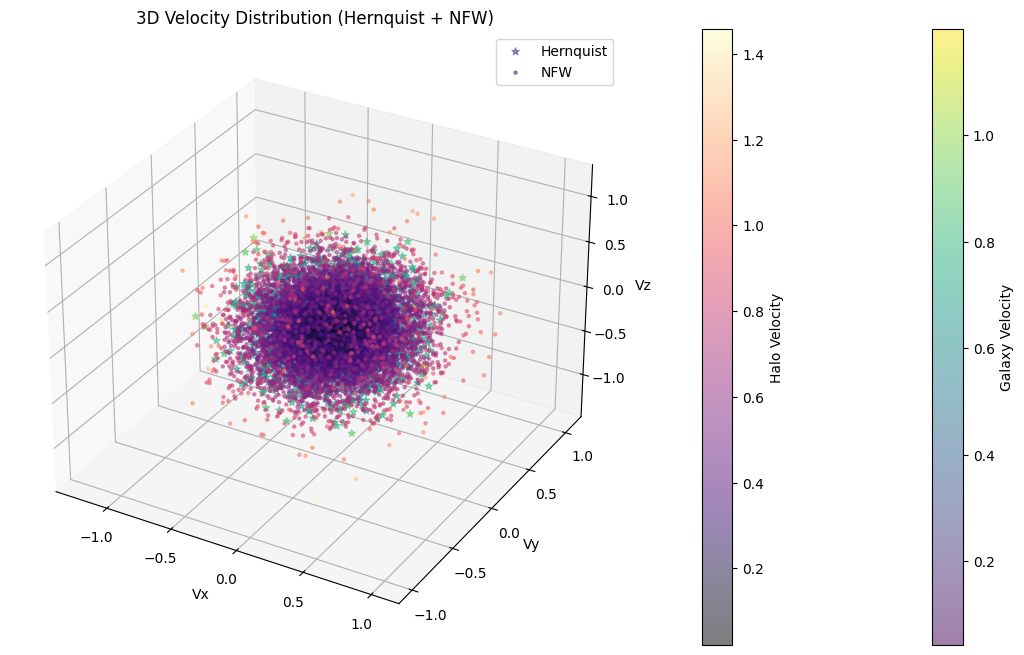

In [ ]:
# Determine limits for zoom
x_min, x_max = min(vx_stars.min(), vx_halo.min()), max(vx_stars.max(), vx_halo.max())  
y_min, y_max = min(vy_stars.min(), vy_halo.min()), max(vy_stars.max(), vy_halo.max())  
z_min, z_max = min(vz_stars.min(), vz_halo.min()), max(vz_stars.max(), vz_halo.max())  

# Plot 3D velocity distribution
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Hernquist scatter plot
scatter_hernquist = ax.scatter(
    vx_stars, vy_stars, vz_stars,
    c=v_stars, cmap='viridis', s=30, alpha=0.5, marker='*', label='Hernquist'
)

# NFW scatter plot
scatter_nfw = ax.scatter(
    vx_halo, vy_halo, vz_halo,
    c=v_halo, cmap='magma', s=5, alpha=0.5, marker='o', label='NFW'
)


ax.set_title("3D Velocity Distribution (Hernquist + NFW)")
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
ax.set_zlabel("Vz")


ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)
ax.axis('auto')

cbar = fig.colorbar(scatter_hernquist, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label("Galaxy Velocity")
cbar1 = fig.colorbar(scatter_nfw, ax=ax, pad=0.1, shrink=0.8)
cbar1.set_label("Halo Velocity")

ax.legend(loc='upper right')
plt.show()


2D velocity distribution (Vx vs Vy)

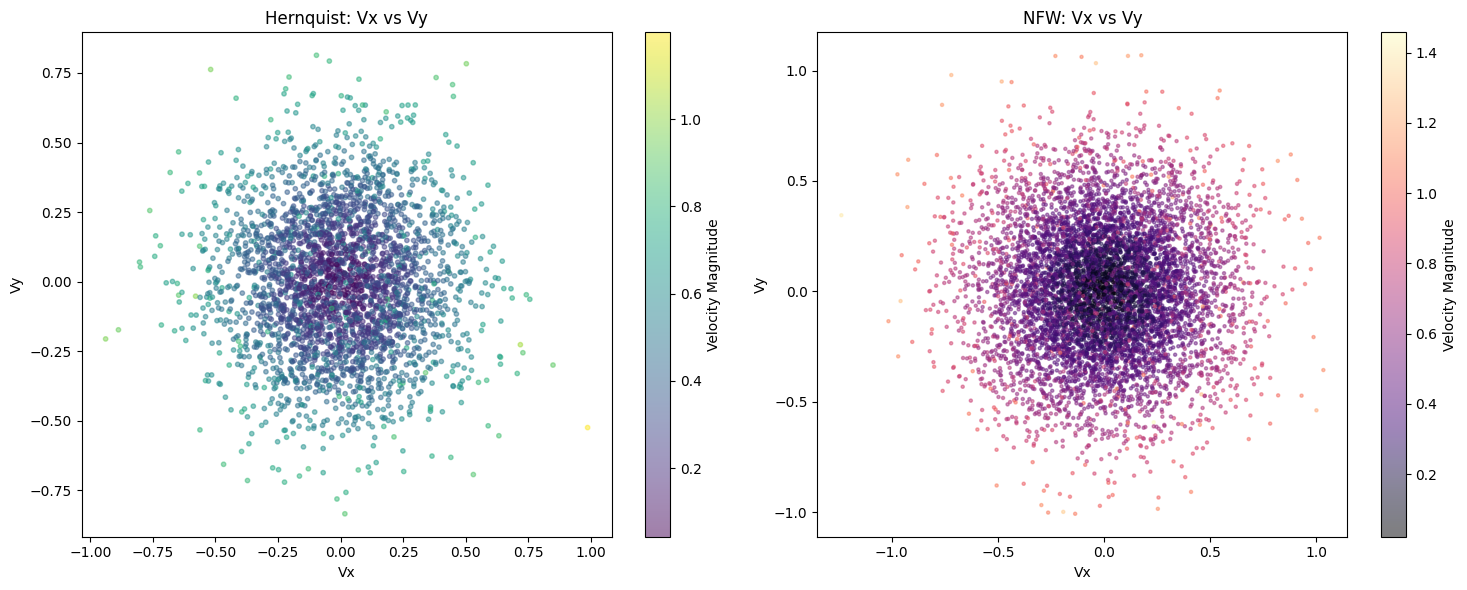

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Stars
scatter_hernquist_xy = axes[0].scatter(vx_stars, vy_stars, c=v_stars, cmap='viridis', s=10, alpha=0.5, label='Hernquist')
axes[0].set_title("Hernquist: Vx vs Vy")
axes[0].set_xlabel("Vx")
axes[0].set_ylabel("Vy")
cbar = fig.colorbar(scatter_hernquist_xy, ax=axes[0])
cbar.set_label("Velocity Magnitude")

# Halo
scatter_nfw_xy = axes[1].scatter(vx_halo, vy_halo, c=v_halo, cmap='magma', s=5, alpha=0.5, label='NFW')
axes[1].set_title("NFW: Vx vs Vy")
axes[1].set_xlabel("Vx")
axes[1].set_ylabel("Vy")
cbar1 = fig.colorbar(scatter_nfw_xy, ax=axes[1])
cbar1.set_label("Velocity Magnitude")

plt.tight_layout()
plt.show()


---

### Method 2: From the Eddington's formula

###  Goal

To compute the distribution function $f(\mathcal{E})$ for a collisionless, spherically symmetric, isotropic, and equilibrium system, given its density profile $\rho(r)$ and gravitational potential $\Phi(r)$.
From this we can generate self-consistent initial conditions for particles in phase space: positions from $\rho(r)$ (as already did), and velocities from $f(\mathcal{E})$.


### To remind the assumptions:

1. **Spherical symmetry**: all physical quantities depend only on radius $r$
2. **Isotropy**: the velocity distribution is the same in all directions, so $f = f(\mathcal{E})$
3. **Dynamical equilibrium**: the system is steady-state (time-independent)
4. **No streaming motion or rotation**


### Key Definitions

- **Total Gravitational potential** $\Phi(r)$: $\Phi(r) = \Phi_{\text{stars}}(r) + \Phi_{\text{halo}}(r)$

- **Relative potential** $\Psi(r)$:  $\Psi(r) = -\Phi(r) + \Phi(r_{\text{max}})$, so that $\Psi(r_{\text{max}}) \approx 0$.

- **Relative energy** (per unit mass):  $\mathcal{E} = \Psi(r) - \frac{1}{2}v^2$. Only particles with $\mathcal{E} > 0$ are bound.

Why do we use the relative potential $\Psi(r)$?

The Eddington inversion method requires knowledge of the distribution function as a function of **binding energy**. To define the energy of a particle in a gravitational potential, we use the **relative potential** which ensures that the potential is **zero at large radii**, i.e., $\Psi(r \rightarrow \infty) \approx 0$, and **positive for bound particles**, with maximum value at the center. Thus, the relative energy: 
$\mathcal{E} = \Psi(r) - \frac{1}{2}v^2$ is positive for bound orbits and zero at escape velocity. This convention simplifies the integration limits in the Eddington formula: particles with $\mathcal{E} > 0$ are gravitationally bound, and those with $\mathcal{E} \leq 0$ are not part of the equilibrium system.

Since we cannot evaluate $\Phi(\infty)$ exactly in numerical computations, we approximate it using the potential at a large radius, $\Phi(r_{\text{max}})$, where the density is negligible and the system is effectively unbound.



### The Eddington Inversion Formula

For isotropic systems, the distribution function is given by:

$$
f(\mathcal{E}) = \frac{1}{\sqrt{8}\pi^2} \cdot \frac{d}{d\mathcal{E}} \int_0^{\mathcal{E}} \frac{d\rho}{d\Psi} \cdot \frac{d\Psi}{\sqrt{\mathcal{E} - \Psi}}
$$

This expression:
- Relates the density as a function of potential to the distribution function
- Requires computing $\rho(\Psi)$, and its derivative $d\rho/d\Psi$


### Implementation Steps

1. Evaluate $\rho(r)$ and $\Psi(r)$ on a grid.
2. Construct $\rho(\Psi)$ using spline interpolation.
3. Differentiate the spline to get $\frac{d\rho}{d\Psi}$.
4. For each energy $\mathcal{E}$, compute the integral:  $\int_0^{\mathcal{E}} \frac{d\rho}{d\Psi} \cdot \frac{d\Psi}{\sqrt{\mathcal{E} - \Psi}}$
5. Differentiate the result with respect to $\mathcal{E}$ to get $f(\mathcal{E})$.
6. Use $f(\mathcal{E})$ for rejection sampling of velocities at each radius.


### Application in the code

- We compute $f_{\text{stars}}(\mathcal{E})$ and $f_{\text{DM}}(\mathcal{E})$ separately using the total potential.
- For each particle:
  - Sample radius from the density profile
  - Compute $\Psi(r)$
  - Sample a velocity magnitude $v$ from $f(\mathcal{E})$
  - Assign a random 3D velocity direction (isotropy)

This should ensure that the resulting particle distribution is in equilibrium, consistent with the specified density and potential profiles.



In [104]:
r_max = 5000 * max(a_hernquist, r_s)
def total_relative_potential(r):
    return -total_potential(r, M_hernquist, a_hernquist, M_NFW, r_s, c) + total_potential(r_max, M_hernquist, a_hernquist, M_NFW, r_s, c)

In [ ]:
# Choose a large radius to approximate "infinity"
r_check = r_max  

# Compute total potential at this radius
phi_at_rmax = total_potential(r_check, M_hernquist, a_hernquist, M_NFW, r_s, c)

print(f"ϕ(r_max = {r_check:.2f}) = {phi_at_rmax:.6f}")


ϕ(r_max = 5000.00) = -0.001164


This function below ``` compute_f_of_E() ``` implements the Eddington inversion to compute the distribution function $f(\mathcal{E})$ for a spherical, isotropic system given its density profile $\rho(r)$ and total potential $\Phi(r)$. It proceeds by evaluating the relative potential $\Psi(r)$ and interpolating $\rho(\Psi)$ using a cubic spline. The derivative $d\rho/d\Psi$ is then used to compute the Eddington integral over the range $\Psi < \mathcal{E}$.

To handle the singularity at $\Psi = \mathcal{E}$ and avoid numerical instability, the code:
- Restricts evaluation to $\Psi < \mathcal{E}$
- Silently suppresses runtime warnings from $\sqrt{\mathcal{E} - \Psi}$
- Uses trapezoidal integration for robustness
- Clips negative values of $f(\mathcal{E})$ to zero

The final result is an interpolator that returns $f(\mathcal{E})$ for any relative energy, enabling accurate sampling of particle velocities consistent with the input density and potential.

In [106]:
import scipy.interpolate as interp
import warnings

def compute_f_of_E(density_func):
    r_grid = np.logspace(-3, np.log10(r_max), 1000)
    psi_grid = total_relative_potential(r_grid)
    rho_grid = density_func(r_grid)

    rho_of_psi = interp.InterpolatedUnivariateSpline(psi_grid[::-1], rho_grid[::-1], k=3)
    d_rho_d_psi = rho_of_psi.derivative()

    E_vals = np.linspace(psi_grid.min(), psi_grid.max(), 500)
    f_vals = []

    for E in E_vals:
        # Define safe integration range
        psi_vals = np.linspace(psi_grid.min(), E, 200)
        valid = psi_vals < E

        # Use interpolation only over valid psi values
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            integrand_vals = np.zeros_like(psi_vals)
            try:
                integrand_vals[valid] = d_rho_d_psi(psi_vals[valid]) / np.sqrt(E - psi_vals[valid])
            except:
                integrand_vals[:] = 0

        # Integrate with trapezoidal rule (more stable)
        integral = np.trapezoid(integrand_vals[valid], psi_vals[valid])
        f_E = (1 / (np.sqrt(8) * np.pi**2)) * integral
        f_vals.append(max(f_E, 0))  # Avoid negatives

    return interp.InterpolatedUnivariateSpline(E_vals, f_vals, k=3)

In [107]:
np.random.seed(42)  

In [108]:
def sample_velocity(f_interp, psi_val, n_samples=1):
    E_min = f_interp.get_knots()[0]
    E_max = f_interp.get_knots()[-1]
    
    v_max = np.sqrt(2 * psi_val)
    v_grid = np.geomspace(0.01*v_max, v_max, 2000)
    E_grid = psi_val - 0.5 * v_grid**2
    E_grid = np.clip(E_grid, E_min, E_max)

    f_grid = f_interp(E_grid)
    f_max = f_grid.max()
    if not np.isfinite(f_max) or f_max == 0:
        return np.zeros(n_samples)  # fallback to zero velocity

    velocities = []
    while len(velocities) < n_samples:
        v_try = np.random.uniform(0, v_max)
        E_try = psi_val - 0.5 * v_try**2
        if not (E_min <= E_try <= E_max):
            continue  # skip out-of-range energies
        f_try = f_interp(E_try)
        if np.random.uniform(0, f_max) < f_try:
            velocities.append(v_try)
    return np.array(velocities)


In [109]:
def sample_stars_and_dm(N_stars, N_dm):
    f_star = compute_f_of_E(hernquist_density)
    f_dm = compute_f_of_E(nfw_density)

    radii_star = sample_radii_hernquist(N_stars)
    positions_star = random_iso_pos(N_stars) * radii_star[:, np.newaxis]

    radii_dm = sample_radii_nfw(N_dm)
    positions_dm = random_iso_pos(N_dm) * radii_dm[:, np.newaxis]

    velocities_star = []
    for r in radii_star:
        psi = total_relative_potential(r)
        v_mag = sample_velocity(f_star, psi, n_samples=1)[0]
        phi_v = np.random.uniform(0, 2 * np.pi)
        costheta_v = np.random.uniform(-1, 1)
        theta_v = np.arccos(costheta_v)
        vx = v_mag * np.sin(theta_v) * np.cos(phi_v)
        vy = v_mag * np.sin(theta_v) * np.sin(phi_v)
        vz = v_mag * np.cos(theta_v)
        velocities_star.append([vx, vy, vz])

    velocities_dm = []
    for r in radii_dm:
        psi = total_relative_potential(r)
        v_mag = sample_velocity(f_dm, psi, n_samples=1)[0]
        phi_v = np.random.uniform(0, 2 * np.pi)
        costheta_v = np.random.uniform(-1, 1)
        theta_v = np.arccos(costheta_v)
        vx = v_mag * np.sin(theta_v) * np.cos(phi_v)
        vy = v_mag * np.sin(theta_v) * np.sin(phi_v)
        vz = v_mag * np.cos(theta_v)
        velocities_dm.append([vx, vy, vz])

    return (np.array(positions_star), np.array(velocities_star),
            np.array(positions_dm), np.array(velocities_dm))

In [110]:
pos_star, vel_star, pos_dm, vel_dm = sample_stars_and_dm(N_stars, N_halo)

In [111]:
masses_stars = np.full(N_stars, m_star)  
masses_halo = np.full(N_halo, m_halo)  

In [112]:
# Combine all positions and velocities
all_pos = np.vstack((pos_star, pos_dm))
all_vel = np.vstack((vel_star, vel_dm))
all_mass = np.concatenate((
    np.full(len(pos_star), masses_stars),
    np.full(len(pos_dm), masses_halo)
))

# Compute center of mass and velocity
com_pos = np.average(all_pos, axis=0, weights=all_mass)
com_vel = np.average(all_vel, axis=0, weights=all_mass)

# Subtract the offsets
pos_star -= com_pos
pos_dm   -= com_pos
vel_star -= com_vel
vel_dm   -= com_vel


In [153]:
# Extract stellar positions
x_stars = pos_star[:, 0]
y_stars = pos_star[:, 1]
z_stars = pos_star[:, 2]

# Extract halo (NFW) positions
x_halo = pos_dm[:, 0]
y_halo = pos_dm[:, 1]
z_halo = pos_dm[:, 2]

In [114]:
r_star_edd = np.linalg.norm(pos_star, axis=1)
v_star_edd = np.linalg.norm(vel_star, axis=1)
r_dm_edd = np.linalg.norm(pos_dm, axis=1)
v_dm_edd = np.linalg.norm(vel_dm, axis=1)

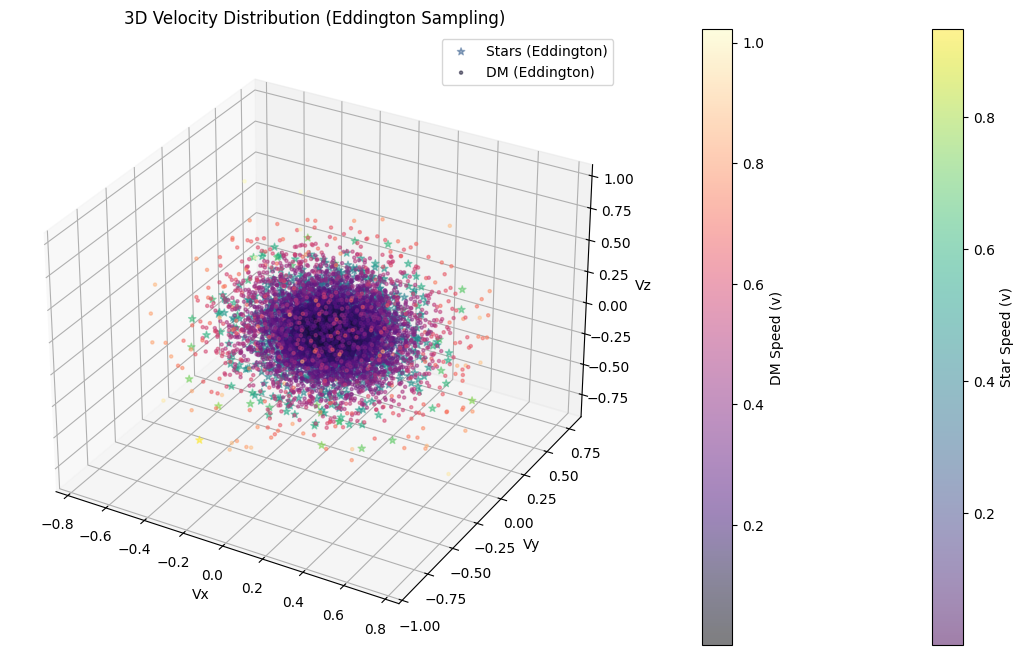

In [116]:
# Extract velocity components
vx_star_edd, vy_star_edd, vz_star_edd = vel_star[:, 0], vel_star[:, 1], vel_star[:, 2]
vx_dm_edd, vy_dm_edd, vz_dm_edd = vel_dm[:, 0], vel_dm[:, 1], vel_dm[:, 2]

# Determine common axis limits based on Eddington data
x_min, x_max = min(vx_star_edd.min(), vx_dm_edd.min()), max(vx_star_edd.max(), vx_dm_edd.max())
y_min, y_max = min(vy_star_edd.min(), vy_dm_edd.min()), max(vy_star_edd.max(), vy_dm_edd.max())
z_min, z_max = min(vz_star_edd.min(), vz_dm_edd.min()), max(vz_star_edd.max(), vz_dm_edd.max())

# Plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Stars (Hernquist)
scatter_stars = ax.scatter(
    vx_star_edd, vy_star_edd, vz_star_edd,
    c=v_star_edd, cmap='viridis', s=30, alpha=0.5, marker='*', label='Stars (Eddington)'
)

# Dark Matter (NFW)
scatter_dm = ax.scatter(
    vx_dm_edd, vy_dm_edd, vz_dm_edd,
    c=v_dm_edd, cmap='magma', s=5, alpha=0.5, marker='o', label='DM (Eddington)'
)

ax.set_title("3D Velocity Distribution (Eddington Sampling)")
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
ax.set_zlabel("Vz")

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)
ax.axis('auto')

# Colorbars
cbar = fig.colorbar(scatter_stars, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label("Star Speed (v)")

cbar1 = fig.colorbar(scatter_dm, ax=ax, pad=0.1, shrink=0.8)
cbar1.set_label("DM Speed (v)")

ax.legend(loc='upper right')
plt.show()


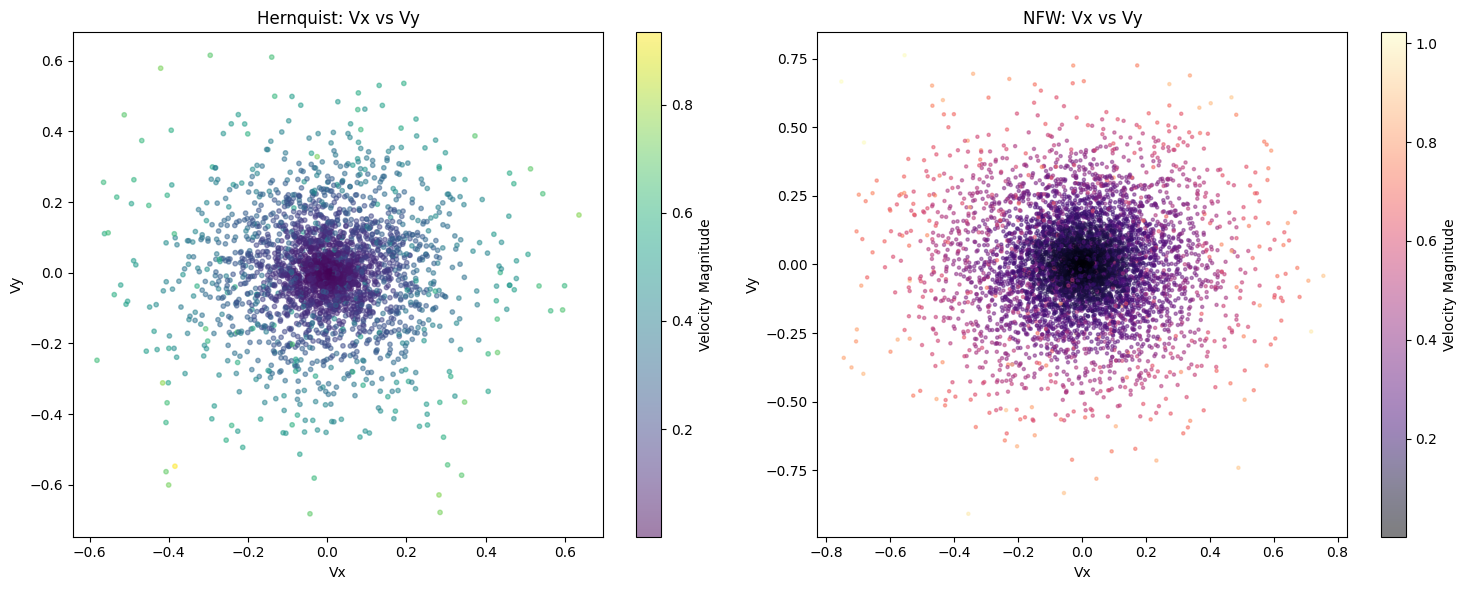

In [117]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Stars
scatter_hernquist_xy = axes[0].scatter(vx_star_edd, vy_star_edd, c=v_star_edd, cmap='viridis', s=10, alpha=0.5, label='Hernquist')
axes[0].set_title("Hernquist: Vx vs Vy")
axes[0].set_xlabel("Vx")
axes[0].set_ylabel("Vy")
cbar = fig.colorbar(scatter_hernquist_xy, ax=axes[0])
cbar.set_label("Velocity Magnitude")

# Halo
scatter_nfw_xy = axes[1].scatter(vx_dm_edd, vy_dm_edd, c=v_dm_edd, cmap='magma', s=5, alpha=0.5, label='NFW')
axes[1].set_title("NFW: Vx vs Vy")
axes[1].set_xlabel("Vx")
axes[1].set_ylabel("Vy")
cbar1 = fig.colorbar(scatter_nfw_xy, ax=axes[1])
cbar1.set_label("Velocity Magnitude")

plt.tight_layout()
plt.show()


## Comparison between the velocity distributions of the two methods

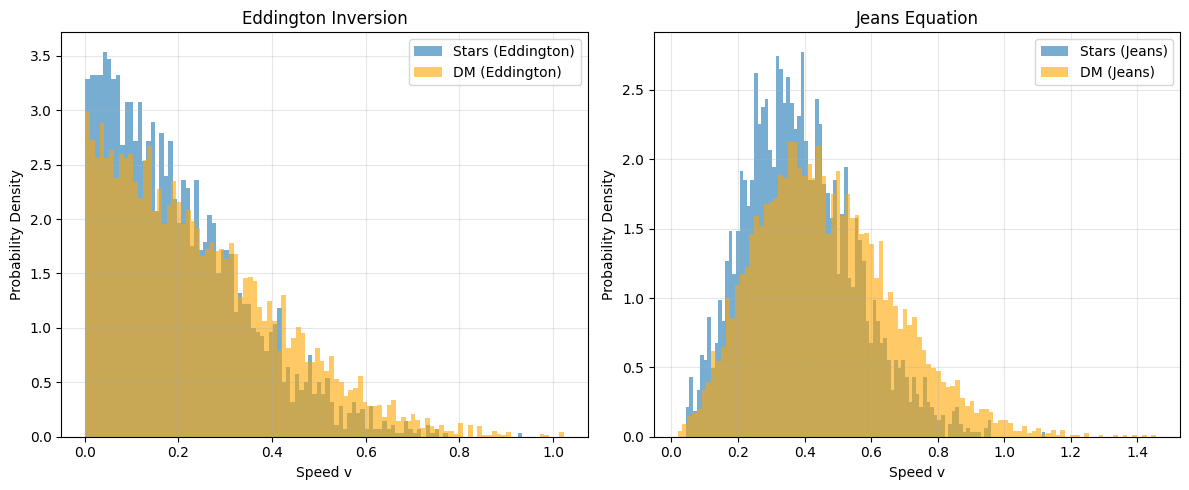

In [162]:
plt.figure(figsize=(12, 5))

# --- Left: Eddington ---
plt.subplot(1, 2, 1)
plt.hist(v_star_edd, bins=100, alpha=0.6, label='Stars (Eddington)', density=True)
plt.hist(v_dm_edd, bins=100, alpha=0.6, label='DM (Eddington)', density=True, color='orange')
plt.xlabel("Speed v")
plt.ylabel("Probability Density")
plt.title("Eddington Inversion")
plt.legend()
plt.grid(alpha=0.3)

# --- Right: Jeans ---
plt.subplot(1, 2, 2)
plt.hist(v_stars, bins=100, alpha=0.6, label='Stars (Jeans)', density=True)
plt.hist(v_halo, bins=100, alpha=0.6, label='DM (Jeans)', density=True, color='orange')
plt.xlabel("Speed v")
plt.ylabel("Probability Density")
plt.title("Jeans Equation")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [119]:
r_vals = np.linspace(0.001, r_max, 500)
v_esc = np.sqrt(2 * total_relative_potential(r_vals))  
v_esc_jeans = np.sqrt(-2 * total_potential(r_vals, M_hernquist, a_hernquist, M_NFW, r_s, c))


Combine the data for the input file:

In [ ]:
masses_stars = np.full(N_stars, m_star)  
masses_halo = np.full(N_halo, m_halo)  

# Combine data
N_total = N_stars + N_halo
tot_m = np.concatenate((masses_stars, masses_halo))
x = np.concatenate((x_stars, x_halo))
y = np.concatenate((y_stars, y_halo))
z = np.concatenate((z_stars, z_halo))

vx = np.concatenate((vx_stars, vx_halo))
vy = np.concatenate((vy_stars, vy_halo))
vz = np.concatenate((vz_stars, vz_halo))

#if you want to use the Eddington data, uncomment the following lines:
"""vx = np.concatenate((vx_star_edd, vx_dm_edd))
vy = np.concatenate((vy_star_edd, vy_dm_edd))
vz = np.concatenate((vz_star_edd, vz_dm_edd))"""

In [28]:
z[3000]==z_halo[0]

np.True_

In [29]:
# Write to file
file = 'gal_nfw_jeans_in.txt'
with open(file, 'w') as file:
    file.write(f'{N_total}\n')
    file.write('3\n')
    file.write('0\n')

    # Write masses
    for m in tot_m:
        file.write(f'{m}\n')

    # Write positions
    for xi, yi, zi in zip(x, y, z):
        file.write(f'{xi} {yi} {zi}\n')

    # Write velocities
    for vxi, vyi, vzi in zip(vx, vy, vz):
        file.write(f'{vxi} {vyi} {vzi}\n')

### Command line parameters

- t_dyn = Dynamical time in internal units, T_unit was exactly the dynamical time
- dtime = Time step for the simulation
- eps   = Softening length
- theta = Opening angle threshold
- tstop = Total simulation time
- dtout = Output time interval

time ./treecode in=gal_nfw_jeans_in.txt  dtime=0.01 eps=0.02 theta=0.5 tstop=40.0 dtout=0.1 out=gal_nfw_jeans_out.txt >logout_jeans.txt


## **What if I add a perturber?**

The mass of the perturber must satisfy $M_{tot} \gg M_{pert} \gg m_{particle}$ in order to make the system experience dynamical friction. We choose as a perturber a compact object, a sort of super massive black hole (that's crazily highly massive because otherwise I need to increase the number of particles, but that takes more computational time...) or an ultra-compact dwarf galaxy.

In [53]:
M_perturber = 5e9 / M_unit  # REMEMBER: 1e9 M_sun is too much for simulating a bh, to have it more physical we need to use a smaller mass and more particles for the galaxy and the halo  
print(f"Mass of perturber: {M_perturber:.5f}")
print(f"Mass of a galaxy particle: {m_star:.5f}")
print(f"Mass of a DM halo particle: {m_halo:.5f}")
print(f"Mass of the Hernquist galaxy: {M_hernquist:.5f}")
print(f"Mass of the NFW DM halo: {M_NFW:.5f}")
print(f"Total mass of the system (galaxy + DM halo): {M_hernquist + M_NFW:.5f}")

Mass of perturber: 0.00500
Mass of a galaxy particle: 0.00003
Mass of a DM halo particle: 0.00014
Mass of the Hernquist galaxy: 0.10000
Mass of the NFW DM halo: 1.00000
Total mass of the system (galaxy + DM halo): 1.10000


In [ ]:
tot_m = np.append(tot_m, M_perturber) # vector with the masses of the particles + the perturber
print(tot_m.shape)
print(tot_m[-1]) #the perturber mass is the last element of the vector

(10001,)
0.005


#### Initialization of the perturber

In [51]:
def Dist(x1, y1, z1, x2, y2, z2):
    return np.linalg.norm(np.array([x1 - x2, y1 - y2, z1 - z2]), axis=0)

m_part = np.concatenate([np.full(N_stars, m_star), np.full(N_halo, m_halo)])  # Stellar + DM

# Compute mass-weighted center of mass
CMpos_vector = np.array([
    np.sum(m_part * x) / np.sum(m_part),
    np.sum(m_part * y) / np.sum(m_part),
    np.sum(m_part * z) / np.sum(m_part)
])

# Compute distances of all particles from CM
dist_particle = Dist(x, y, z, CMpos_vector[0], CMpos_vector[1], CMpos_vector[2])

dist_part_90 = np.quantile(dist_particle, 0.9)
dist_part_50 = np.quantile(dist_particle, 0.5)
dist_part_10 = np.quantile(dist_particle, 0.1)

dist_pert= 1.5 * a_hernquist

print(f'radius of the 90th quantile = {dist_part_90:.3f}')
print(f'radius of the 50th quantile = {dist_part_50:.3f}')
print(f'radius of the 10th quantile = {dist_part_10:.3f}')
print(f'Starting radius of the perturber= {dist_pert:.3f}')

radius of the 90th quantile = 2.169
radius of the 50th quantile = 0.737
radius of the 10th quantile = 0.128
Starting radius of the perturber= 0.364


To have a faster simulation, we choose to initialize the perturber position at about $1.5$ times the scale radius of the galaxy ($a_{hernquist}$) in the $x$ component.

In [54]:
# Perturber position
x_pert = dist_pert
y_pert = 0
z_pert = 0

x = np.append(x, x_pert)
y = np.append(y, y_pert)
z = np.append(z, z_pert)

perturber_position = np.array([x_pert, y_pert, z_pert])

Here below the representation of how the perturber potential acts on the total potential of the distribution.

In [ ]:
epsilon = 0.01
def perturber_potential(x, y, z, perturber_mass, perturber_position): 
    r = np.sqrt((x - perturber_position[0])**2 + 
                (y - perturber_position[1])**2 + 
                (z - perturber_position[2])**2)
    return -G * perturber_mass / np.sqrt(r**2+epsilon**2)  # Softening length to avoid singularity

# Update the total potential to include the perturber
def total_potential_with_perturber(x, y, z, r, M_hernquist, a_hernquist, M_NFW, r_s, c, M_perturber, r_perturber):
    phi_total = total_potential(r, M_hernquist, a_hernquist, M_NFW, r_s, c)
    phi_perturber = perturber_potential(x, y, z, M_perturber, r_perturber)
    return phi_total + phi_perturber

In [100]:
perturber_pot = perturber_potential(x, y, z, M_perturber, perturber_position)

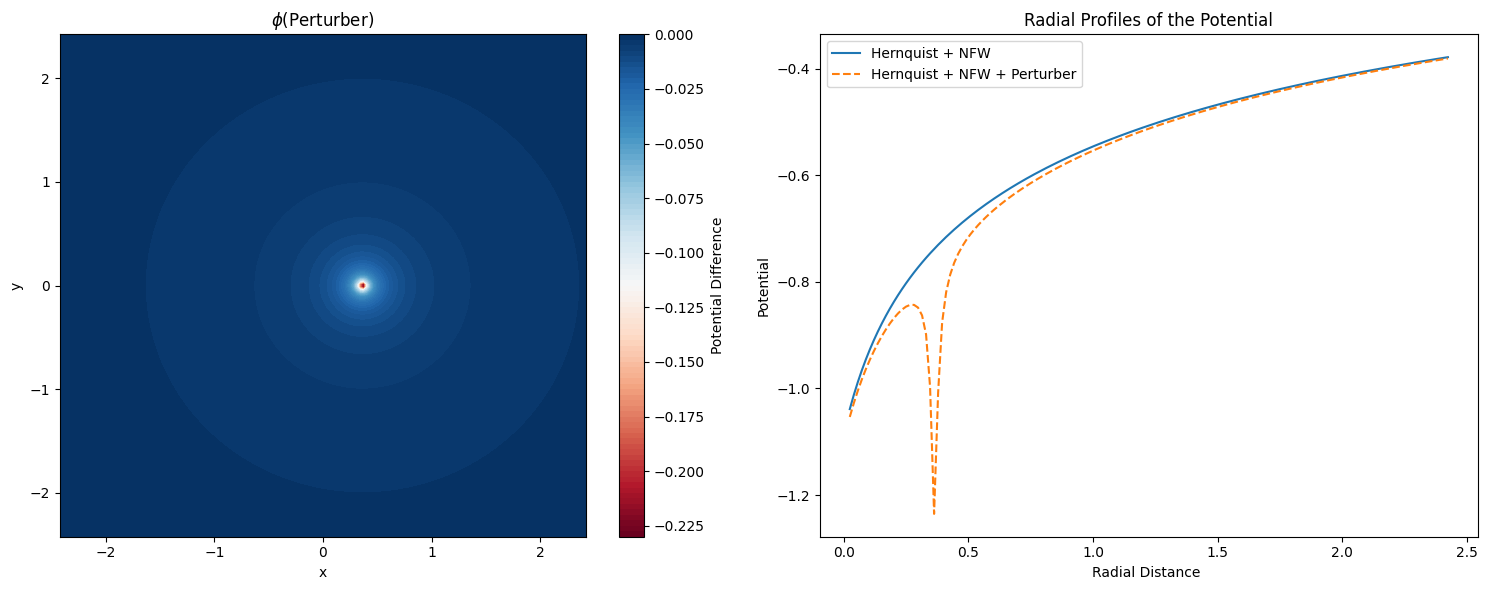

In [102]:
grid_points = 150
x_grid = np.linspace(-10 * a_hernquist, 10 * a_hernquist, grid_points)
y_grid = np.linspace(-10 * a_hernquist, 10 * a_hernquist, grid_points)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
r_grid = np.sqrt(x_grid**2 + y_grid**2)
z_grid = np.zeros_like(x_grid)  

# Compute potentials
pot_hernquist_nfw = total_potential(r_grid, M_hernquist, a_hernquist, M_NFW, r_s, c)
pot_with_perturber = total_potential_with_perturber(
    x_grid, y_grid, z_grid, r_grid,
    M_hernquist, a_hernquist, M_NFW, r_s, c,
    M_perturber, perturber_position
)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


# Difference between potentials
pot_difference = pot_with_perturber - pot_hernquist_nfw

# Plot the difference as a 2D contour map

contour = axes[0].contourf(x_grid, y_grid, pot_difference, levels=100, cmap="RdBu")
cbar = fig.colorbar(contour, ax=axes[0])
cbar.set_label("Potential Difference")
axes[0].set_title("$\phi$(Perturber)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

radial_distances = np.linspace(0.1 * a_hernquist, 10 * a_hernquist, grid_points)
potential_hernquist_nfw = total_potential(radial_distances, M_hernquist, a_hernquist, M_NFW, r_s, c)
potential_with_perturber = total_potential_with_perturber(
    radial_distances, np.zeros_like(radial_distances), np.zeros_like(radial_distances), radial_distances,
    M_hernquist, a_hernquist, M_NFW, r_s, c, M_perturber, perturber_position
)

axes[1].plot(radial_distances, potential_hernquist_nfw, label="Hernquist + NFW")
axes[1].plot(radial_distances, potential_with_perturber, label="Hernquist + NFW + Perturber", linestyle="--")
axes[1].set_xlabel("Radial Distance ")
axes[1].set_ylabel("Potential")
axes[1].set_title("Radial Profiles of the Potential")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
r_initial = np.linalg.norm(perturber_position) #  distance of the perturber from the center of the distribution at the initial moment
phi_initial = total_potential_with_perturber(
    x, y, z, r_initial,
    M_hernquist, a_hernquist, M_NFW, r_s, c,
    M_perturber, perturber_position
)

phi_perturber_position = np.interp(r_initial, np.linalg.norm([x, y, z], axis=0), phi_initial)

# Escape velocity at the perturber's position
v_escape = np.sqrt(-2 * phi_perturber_position)

## Captured Perturber

For semplicity, we set the initial velocity to be a circular velocity (ideally getting a circular orbit). To do so, the velocity vector must be perpendicular to the position vector and, so, the circular velocity must have the following form: $v_{circ} = \sqrt{r_{initial}|\frac{d\Phi(r)}{dr}|}$, where $r_{initial}$ is the initial position of the perturber. Using the **Newton theorem**: *any spherically symmetric mass outside the radius r does not exert a net gravitational force on an object at r*. This means that only the mass inside r contributes to the gravitational attraction that determines the circular velocity. Therefore, $v_{circ} = \sqrt{\frac{G M(<r)}{r}}$. \
N.B. The mentioned formula comes from the fact that the centripetal force acting on the perturber must exactly balance the gravitational force due to the potential.

In [67]:
def M_enc(r):
    """Compute the enclosed mass at radius r."""
    return np.sum(m_part[dist_particle <= r])

# Compute enclosed mass at r pert
M_enclose = M_enc(dist_pert)

print(f"Enclosed mass = {M_enclose:.3f} ")

# Compute circular velocity v_c = sqrt(G M_enc / r)
v_circular = np.sqrt(G * M_enclose / dist_pert)

print(f"v_circular = {v_circular:.3f}")


Enclosed mass = 0.252 
v_circular = 0.832


In [68]:
v_circular/v_escape

np.float64(0.6810729398288584)

In [93]:
x_pert = dist_pert
y_pert = 0
z_pert = 0

vx_pert= 0
vy_pert= v_circular
vz_pert= 0

## Attention! 
### The perturber is added in the system galaxy + halo after it reaches the dynamical equilibrium. See the analysis in the first part of the second notebook.

The perturber is inserted after the system (galaxy + DM halo) has reached dynamical equilibrium. \
Given the low mass of the perturber relative to the total system ($M_{\text{pert}} = 0.005 << M_{tot} = 1.1$), the perturber is treated as an external addition rather than a component requiring re-equilibration of the existing distribution. The original velocities of stars and dark matter particles are therefore left unchanged. The initial positions and velocities of the distribution are the ones corresponding to $time (IU) = 10.5$ of the file ```gal_nfw_jeans_out.txt```. To understand better how this value is chosen, please refer to the first section of the notebook: ```hernquist_and_nfw_analysis.ipynb```

From the code below the initial conditions for the system galaxy + DM halo are extracted as explained.

In [ ]:
filename = './gal_nfw_jeans_out.txt'
target_time = 10.500145
masses = []
x, y, z = [], [], []
vx, vy, vz = [], [], []

with open(filename, 'r') as file:
    N = int(file.readline().strip())  # number of particles
    _ = file.readline()               # skip header line 

    while True:
        line = file.readline()
        if not line:
            print("Reached end of file without finding target time.")
            break

        # Try interpreting the line as the time header
        try:
            current_time = float(line.strip())
        except ValueError:
            continue  # skip malformed lines

        if current_time == target_time:
            try:
                # Read masses
                masses = [float(file.readline().strip()) for _ in range(N)]

                # Read positions
                for _ in range(N):
                    px, py, pz = map(float, file.readline().strip().split())
                    x.append(px)
                    y.append(py)
                    z.append(pz)

                # Read velocities
                for _ in range(N):
                    vvx, vvy, vvz = map(float, file.readline().strip().split())
                    vx.append(vvx)
                    vy.append(vvy)
                    vz.append(vvz)

                print(f"✅ Snapshot at t = {target_time} successfully read.")
                break

            except Exception as e:
                print("Error while reading snapshot block:", e)
                break


✅ Snapshot at t = 10.500145 successfully read.


#### Rapid check if this setting is ensuring a bound orbit.

In [70]:
v = np.linalg.norm([0, v_circular, 0])
K_per_mass = 0.5 * v**2  # Kinetic energy per unit mass 

# Potential energy per unit mass
U_per_mass = -G * (M_NFW+M_hernquist) / r_initial  # Potential energy per unit mass 

# Total specific energy (energy per unit mass)
E_per_mass = K_per_mass + U_per_mass

if E_per_mass < 0:
    print("The orbit is bound.")
else:
    print("The orbit is unbound.")

print(E_per_mass)


The orbit is bound.
-2.679156601872469


## Write the input file

Now the input file is written: the last line of each block is dedicated to the perturber initialization values.

In [94]:
N_particles = len(masses)
N_total = N_particles + 1

# Combine masses
tot_m = masses + [M_perturber]

# Combine positions
x.append(x_pert)
y.append(y_pert)
z.append(z_pert)

# Combine velocities
vx.append(vx_pert)
vy.append(vy_pert)
vz.append(vz_pert)

# --- Write to file ---
output_filename = 'gal_nfw_pert_20_05_in.txt'

with open(output_filename, 'w') as file:
    file.write(f'{N_total}\n')
    file.write('3\n')         # format ID or header
    file.write('0\n')         # time = 0 for restart

    # Masses
    for m in tot_m:
        file.write(f'{m:.8e}\n')

    # Positions
    for xi, yi, zi in zip(x, y, z):
        file.write(f'{xi:.8e} {yi:.8e} {zi:.8e}\n')

    # Velocities
    for vxi, vyi, vzi in zip(vx, vy, vz):
        file.write(f'{vxi:.8e} {vyi:.8e} {vzi:.8e}\n')

print(f"✅ New input file '{output_filename}' successfully written with {N_total} particles.")


✅ New input file 'gal_nfw_pert_20_05_in.txt' successfully written with 10001 particles.


In [98]:
# Re-open and read the newly created file
input_file = 'gal_nfw_pert_20_05_in.txt'

with open(input_file, 'r') as f:
    N = int(f.readline().strip())
    _ = f.readline()  # skip format ID
    _ = f.readline()  # skip time

    # Read all masses
    masses = [float(f.readline().strip()) for _ in range(N)]

    # Read all positions
    positions = [list(map(float, f.readline().strip().split())) for _ in range(N)]

    # Read all velocities
    velocities = [list(map(float, f.readline().strip().split())) for _ in range(N)]

# Extract last particle (perturber)
m_pert = masses[10000]
x_pert, y_pert, z_pert = positions[10000]
vx_pert, vy_pert, vz_pert = velocities[10000]

# Display results
print("✅ Perturber found in last position of file:")
print(f"Mass      = {m_pert:.5e}")
print(f"Position  = ({x_pert:.5f}, {y_pert:.5f}, {z_pert:.5f})")
print(f"Velocity  = ({vx_pert:.5f}, {vy_pert:.5f}, {vz_pert:.5f})")


✅ Perturber found in last position of file:
Mass      = 5.00000e-03
Position  = (0.36359, 0.00000, 0.00000)
Velocity  = (0.00000, 0.83219, 0.00000)


## Command line parameters for the simulation with the perturber

In [7]:
t_dyn = 1.0 # Dynamical time in internal units, T_unit was exactly the dynamical time
dtime = 0.001 * t_dyn # Smaller time step for better resolution with perturber
#eps = 0.01 * r_s_iu # Softening length try by default 0.025
theta = 0.40 # Opening angle threshold
tstop = 10 * t_dyn # Total simulation time
dtout = 0.01 # Output time interval

In [8]:
print('time ./treecode in=gal_nfw_pert_20_05_3_in.txt  dtime='+ str(dtime) +' theta='+str(theta)+ ' tstop='+str(tstop) + ' dtout='+str(dtout)+' out=gal_nfw_pert_20_05_3_out.txt >logout_jeans_pert_20_05_3.txt')

time ./treecode in=gal_nfw_pert_20_05_3_in.txt  dtime=0.001 theta=0.4 tstop=10.0 dtout=0.01 out=gal_nfw_pert_20_05_3_out.txt >logout_jeans_pert_20_05_3.txt
